In [ ]:
# !pip install tensorflow-text
# !pip install -U numpy
# !pip install tensorflow

In [1]:
import tensorflow_hub as hub 
import tensorflow_text as text
import os

In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
# Enable GPU 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

In [6]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.groupby('v1').describe()

v2         ... Unnamed: 4     
     count unique  ...        top freq
v1                 ...                
ham   4825   4516  ...    GNT:-)"    2
spam   747    653  ...        NaN  NaN

[2 rows x 16 columns]

In [8]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
df_spam = df[df['v1']=='spam']
df_spam.shape

(747, 5)

In [10]:
df_spam = df_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
print(df_spam)

        v1                                                 v2
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [11]:
df_ham = df[df['v1']=='ham']
df_ham.shape

(4825, 5)

In [12]:
df_ham = df_ham.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
print(df_ham.shape)

(4825, 2)


In [13]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])

In [14]:
print("shape of df_ham_downsampled.shape and df_spam.shape:", df_ham_downsampled.shape, df_spam.shape)

shape of df_ham_downsampled.shape and df_spam.shape: (747, 2) (747, 2)


In [15]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])

print("shape of df_balanced\n", df_balanced.shape)
print("--------------------------------------------")
print(df_balanced['v1'].value_counts())
print("--------------------------------------------")
print(df_balanced)

shape of df_balanced
 (1494, 2)
--------------------------------------------
spam    747
ham     747
Name: v1, dtype: int64
--------------------------------------------
        v1                                                 v2
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5463   ham                                  U GOIN OUT 2NITE?
2519   ham         Ok. I only ask abt e movie. U wan ktv oso?
395    ham  From here after The performance award is calcu...
3077   ham             Okay but i thought you were the expert
4769   ham  CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...

[1494 rows x 2 columns]


In [16]:
df_balanced['spam'] = df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,v1,v2,spam
4964,ham,"A few people are at the game, I'm at the mall ...",0
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...,1
2548,ham,Honestly i've just made a lovely cup of tea an...,0
5425,ham,Otherwise had part time job na-tuition..,0
629,spam,Todays Vodafone numbers ending with 4882 are s...,1
4734,ham,Oh k:)after that placement there ah?,0
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...,1
5214,spam,Natalja (25/F) is inviting you to be her frien...,1
1072,spam,Dear U've been invited to XCHAT. This is our f...,1
1802,ham,Ok lor thanx... ÌÏ in school?,0


In [17]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'], df_balanced['spam'], stratify=df_balanced['spam'])

In [18]:
print("X train\n", X_train.head(4))
print()
print("y train\n", y_train.head(4))

X train
 3190    UR awarded a City Break and could WIN a å£200 ...
4357    Our dating service has been asked 2 contact U ...
640     Well imma definitely need to restock before th...
4963    Dear Voucher holder Have your next meal on us....
Name: v2, dtype: object

y train
 3190    1
4357    1
640     0
4963    1
Name: spam, dtype: int64


In [19]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder    = hub.KerasLayer(encoder_url)

In [20]:
def get_sentence_embedding(sentences):
    
    preprocessed_text = bert_preprocess(sentences)
    cls = bert_encoder(preprocessed_text)['pooled_output']

    print("keys of preprocessed_text\n", preprocessed_text.keys())

    return cls

In [21]:
# example output
# The following encodings are returned by pre-trained BERT model 'encoder_url'

get_sentence_embedding([
    'Hello, my name is jinhyun',
    'I am now at KNU'
])

keys of preprocessed_text
 dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.82256454, -0.46389204, -0.96248907, ..., -0.90597314,
        -0.73984265,  0.82237375],
       [-0.8080397 , -0.38260725, -0.38561723, ..., -0.00837929,
        -0.5941718 ,  0.83039284]], dtype=float32)>

In [22]:
e = get_sentence_embedding([
    'banana',
    'grapes',
    'mango',
    'jeff bezos',
    'elon musk',
    'bill gates'             
])

keys of preprocessed_text
 dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])


In [23]:
print("embeddings of the above words\n", e)
print()
print("shape of e\n", e.shape)

embeddings of the above words
 tf.Tensor(
[[-0.7606924  -0.14219402  0.49604616 ...  0.4216532  -0.5322144
   0.80312175]
 [-0.86023194 -0.21242903  0.4915702  ...  0.3979814  -0.60506254
   0.8447165 ]
 [-0.7128873  -0.15463948  0.38401625 ...  0.35278714 -0.50991404
   0.7347418 ]
 [-0.825335   -0.35550606 -0.59069705 ... -0.01613726 -0.61417615
   0.872303  ]
 [-0.7504137  -0.268126   -0.26689777 ...  0.02839315 -0.59381
   0.7974992 ]
 [-0.7854428  -0.29949576  0.4102777  ...  0.5222555  -0.4957344
   0.8150739 ]], shape=(6, 768), dtype=float32)

shape of e
 (6, 768)


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity([ e[0] ], [ e[1] ]))
print(cosine_similarity([ e[0] ], [ e[2] ]))
print(cosine_similarity([ e[3] ], [ e[4] ]))

[[0.99110895]]
[[0.99540985]]
[[0.9872036]]


In [25]:
# BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# NN Layers 
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])  # input is outputs['pooled_output']
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)    # input is l

# construct final model 
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [26]:
model.summary() # Total parameters==769 because the classification vector size is 768. There is one more parameter because of the final output.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [27]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name="accuracy"),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [28]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 45s 754ms/step - loss: 0.6187 - accuracy: 0.6920 - precision: 0.6930 - recall: 0.6893
Epoch 2/10
35/35 [==============================] - 25s 703ms/step - loss: 0.5065 - accuracy: 0.7946 - precision: 0.7875 - recall: 0.8071
Epoch 3/10
35/35 [==============================] - 25s 708ms/step - loss: 0.4458 - accuracy: 0.8286 - precision: 0.8140 - recall: 0.8518
Epoch 4/10
35/35 [==============================] - 25s 711ms/step - loss: 0.4042 - accuracy: 0.8625 - precision: 0.8512 - recall: 0.8786
Epoch 5/10
35/35 [==============================] - 27s 760ms/step - loss: 0.3679 - accuracy: 0.8786 - precision: 0.8630 - recall: 0.9000
Epoch 6/10
35/35 [==============================] - 25s 704ms/step - loss: 0.3487 - accuracy: 0.8911 - precision: 0.8750 - recall: 0.9125
Epoch 7/10
35/35 [==============================] - 25s 704ms/step - loss: 0.3328 - accuracy: 0.8830 - precision: 0.8730 - recall: 0.8964
Epoch 8/10
35/35 [================

In [29]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 10s 691ms/step - loss: 0.2640 - accuracy: 0.9251 - precision: 0.9119 - recall: 0.9412


[0.2640407681465149,
 0.9251337051391602,
 0.9119170904159546,
 0.9411764740943909]

In [30]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [31]:
import numpy as np 

In [32]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
print(y_predicted)

[1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 1 0]


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[170  17]
 [ 11 176]]


In [35]:
from matplotlib import pyplot as plt 
import seaborn as sn 

Text(33.0, 0.5, 'Truth')

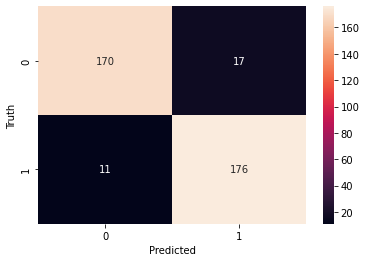

In [36]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       187
           1       0.91      0.94      0.93       187

    accuracy                           0.93       374
   macro avg       0.93      0.93      0.93       374
weighted avg       0.93      0.93      0.93       374

